In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Student_performance_10k.csv")
df.head()


,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [4]:
df.isnull().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

In [5]:
df['math_score'] = pd.to_numeric(df['math_score'],  errors='coerce')

In [6]:
# Filling missing numeric values with the column mean
df['math_score'] = df['math_score'].fillna(df['math_score'].mean())
df['reading_score'] = df['reading_score'].fillna(df['reading_score'].mean())
df['writing_score'] = df['writing_score'].fillna(df['writing_score'].mean())
df['science_score'] = df['science_score'].fillna(df['science_score'].mean())
df['total_score'] = df['total_score'].fillna(df['total_score'].mean())


In [7]:
# Filling missing categorical values with the mode (most frequent value)
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['race_ethnicity'] = df['race_ethnicity'].fillna(df['race_ethnicity'].mode()[0])
df['parental_level_of_education'] = df['parental_level_of_education'].fillna(df['parental_level_of_education'].mode()[0])
df['lunch'] = df['lunch'].fillna(df['lunch'].mode()[0])
df['test_preparation_course'] = df['test_preparation_course'].fillna(df['test_preparation_course'].mode()[0])

In [8]:
df['roll_no'] = df['roll_no'].fillna('0')

In [9]:
df = pd.get_dummies(df, columns=['grade'], drop_first=True)  # One-hot encoding

In [10]:
# 4. Check for inconsistencies in categorical columns (e.g., unexpected values)
print("\nUnique values in categorical columns:")
print(f"Gender: {df['gender'].unique()}")
print(f"Race/Ethnicity: {df['race_ethnicity'].unique()}")
print(f"Parental Level of Education: {df['parental_level_of_education'].unique()}")
print(f"Lunch: {df['lunch'].unique()}")
print(f"Test Preparation Course: {df['test_preparation_course'].unique()}")


Unique values in categorical columns:
Gender: ['male' 'female' 'Boy' '\\tmale' 'Girl']
Race/Ethnicity: ['group D' 'group B' 'group C' 'group E' 'group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']
Parental Level of Education: ['some college' 'high school' "master's degree" "associate's degree"
 'some high school' "bachelor's degree"]
Lunch: [1. 0.]
Test Preparation Course: [1. 0.]


In [11]:
# Clean gender
df['gender'] = df['gender'].astype(str).str.strip().str.lower().replace({
    'boy': 'male',
    '\\tmale': 'male',
    'girl': 'female'
})

# Clean race/ethnicity
df['race_ethnicity'] = df['race_ethnicity'].astype(str).str.strip().str.replace(r'\n', '', regex=True).replace({
    'A': 'group A',
    'B': 'group B',
    'C': 'group C',
    'D': 'group D',
    'E': 'group E'
})


In [12]:
print(f"Skewness before transformation for math_score: {df['math_score'].skew()}")

Skewness before transformation for math_score: -0.10928981195215004


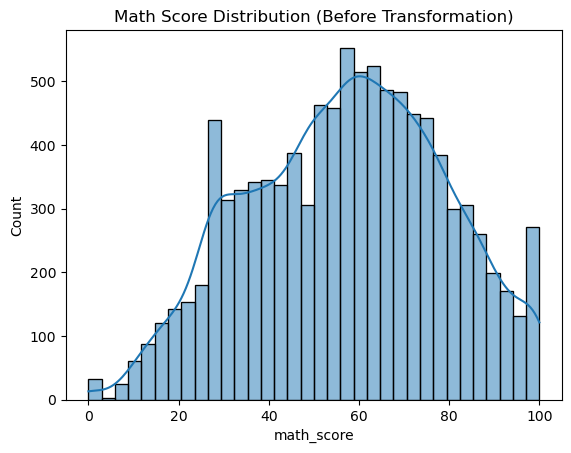

In [15]:
# Plot histogram for 'math_score' to visualize skewness
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['math_score'], kde=True)
plt.title('Math Score Distribution (Before Transformation)')
plt.show()


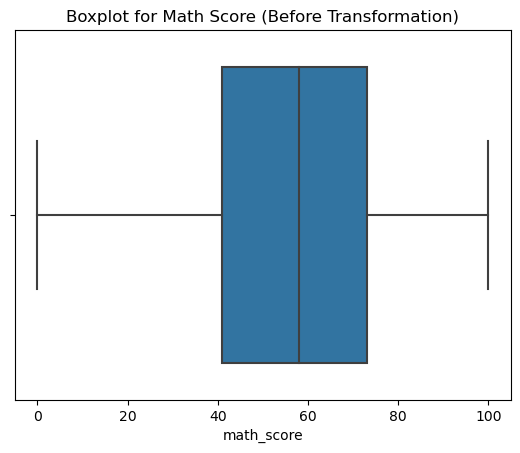

In [16]:
# Boxplot to visualize outliers in 'math_score'
sns.boxplot(x=df['math_score'])
plt.title('Boxplot for Math Score (Before Transformation)')
plt.show()

In [30]:
df['math_score_sqrt'] = np.sqrt(df['math_score'])
print(f"Skewness after square root transformation: {df['math_score_sqrt'].skew()}")

Skewness after square root transformation: -0.7779550504935054


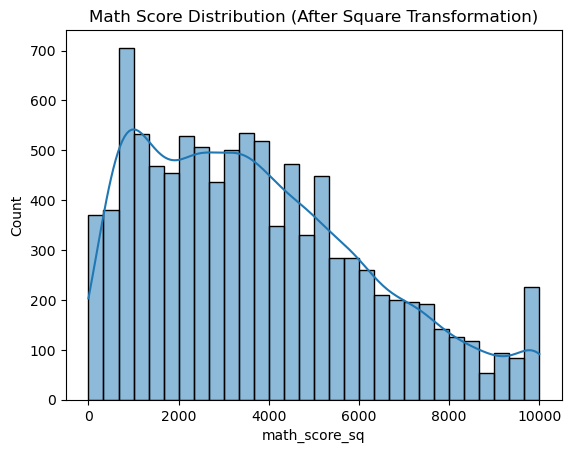

In [28]:

sns.histplot(df['math_score_sq'], kde=True)
plt.title("Math Score Distribution (After Square Transformation)")
plt.show()

In [32]:

print(f"Skewness after Cube Root transformation: {df['math_score_cbrt'].skew()}")

Skewness after Cube Root transformation: -1.4423395975652662


In [33]:
df['math_score_cbrt'] = np.sqrt(df['math_score'])

In [34]:

print(f"Skewness after Cube Root transformation: {df['math_score_cbrt'].skew()}")

Skewness after Cube Root transformation: -0.7779550504935054


In [ ]:
# Log transformation (add 1 to avoid issues with zeros or negative values)
df['math_score_log'] = np.log(df['math_score'] + 1)  # Adding 1 to handle zero values in the data



<Axes: xlabel='math_score', ylabel='Density'>

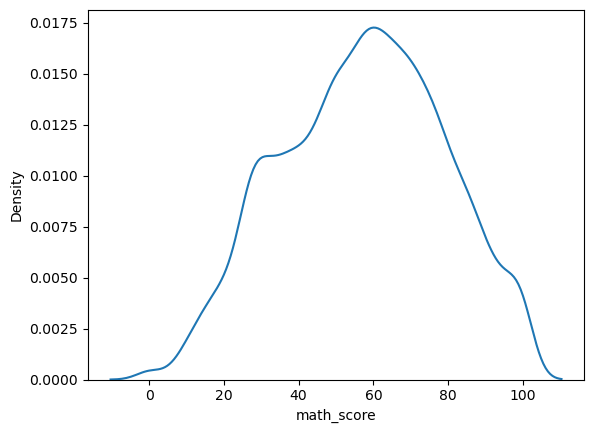

In [35]:
sns.kdeplot(df['math_score'])

In [36]:
df.skew()

C:\Users\hp\AppData\Local\Temp\ipykernel_13196\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


lunch                      -0.606591
test_preparation_course     0.460614
math_score                 -0.109290
reading_score              -0.333720
writing_score              -0.391413
science_score              -0.310703
total_score                -0.308056
grade_B                    -0.265960
grade_C                     1.035715
grade_D                     3.461019
grade_Fail                 12.583484
math_score_log             -2.362184
math_score_sq               0.613655
math_score_cube             1.169354
math_score_sqrt            -0.777955
math_score_cbrt            -0.777955
dtype: float64